<a href="https://colab.research.google.com/github/juno-yuu/COVID-Vaccine-and-Biotech-industry/blob/Erin/Crazy_return_Final_Project_Clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Github

In [4]:
!git clone https://github.com/juno-yuu/COVID-Vaccine-and-Biotech-industry.git

Cloning into 'COVID-Vaccine-and-Biotech-industry'...
remote: Enumerating objects: 173, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 173 (delta 91), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (173/173), 7.24 MiB | 6.11 MiB/s, done.
Resolving deltas: 100% (91/91), done.


### Imports

In [5]:
import warnings
warnings.filterwarnings('ignore')
import requests
import io
import pandas.util.testing as tm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

### Read Datasets

In [6]:
# vaccination dataset
vacci = pd.read_csv('https://raw.githubusercontent.com/juno-yuu/COVID-Vaccine-and-Biotech-industry/main/us_state_vaccinations.csv', index_col = 0)

# comfirmed
case_confirmed = pd.read_csv("/content/COVID-Vaccine-and-Biotech-industry/time_series_covid19_confirmed_US.csv")

# death
case_death = pd.read_csv("/content/COVID-Vaccine-and-Biotech-industry/time_series_covid19_deaths_US.csv")

# latest data
update = pd.read_csv("/content/COVID-Vaccine-and-Biotech-industry/05-26-2021_us.csv")

# manufacture daily
manu = pd.read_csv("https://raw.githubusercontent.com/xinyanz-erin/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv", index_col = 1)

# stock prices
mrna = pd.read_csv('https://raw.githubusercontent.com/juno-yuu/COVID-Vaccine-and-Biotech-industry/main/MRNA.csv', index_col = 0).rename(str.lower, axis='columns')
pfe = pd.read_csv('https://raw.githubusercontent.com/juno-yuu/COVID-Vaccine-and-Biotech-industry/main/PFE.csv', index_col = 0).rename(str.lower, axis='columns')
jnj = pd.read_csv('https://raw.githubusercontent.com/juno-yuu/COVID-Vaccine-and-Biotech-industry/main/JNJ.csv', index_col = 0).rename(str.lower, axis='columns')

### Check datasets

In [7]:
vacci.head()

,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
date,,,,,,,,,,,,,
2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN


In [8]:
case_confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6760,6763,6763,6773,6793,6819,6835,6876,6879,6882,6889,6890,6897,6904,6907,6909,6910,6910,6914,6914,6918,6918,6920,6920,6926,6928,6938,6971,7001,7005,7010,7015,7017,7049,7106,7113,7118,7118,7126,7135
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20714,20723,20730,20764,20787,20815,20833,20838,20847,20863,20875,20897,20921,20941,20966,20983,20993,20993,21035,21093,21107,21123,21131,21135,21154,21170,21191,21290,21392,21411,21422,21444,21467,21489,21511,21535,21546,21554,21578,21593
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2271,2271,2271,2275,2284,2289,2292,2296,2296,2296,2297,2298,2299,2300,2302,2302,2302,2302,2307,2307,2307,2307,2308,2308,2310,2314,2317,2319,2320,2320,2320,2322,2324,2326,2327,2328,2328,2328,2331,2331
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2563,2563,2567,2569,2569,2573,2578,2582,2584,2584,2588,2591,2593,2594,2596,2596,2597,2597,2604,2604,2604,2605,2607,2607,2609,2612,2615,2630,2645,2647,2648,2651,2652,2656,2657,2656,2658,2659,2660,2662
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6529,6532,6532,6548,6556,6563,6570,6570,6571,6574,6581,6595,6607,6613,6616,6619,6621,6621,6635,6645,6651,6656,6660,6661,6678,6680,6694,6750,6771,6773,6776,6794,6808,6816,6826,6829,6832,6832,6847,6856


In [9]:
case_death.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",55869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,106,106,106,106,107,107,107,107,107,107,107,107,107,107,107,107,107,107,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,109,109,110,110,110,110,110
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,302,302,302,302,302,303,303,305,305,305,305,305,305,305,306,306,306,306,307,307,307,308,308,308,308,309,309,309,310,310,310,310,310,310,310,310,310,310,310,310
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",24686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,55,55,55,55,55,56,56,56,56,56,56,56,56,56,56,56,56,56,56,57,57,57,57,57,57,56,56,56,56,56,56,56,56,58,58,58,58,58,58,58
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",22394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,61,61,61,61,61,62,62,62,62,62,62,63,63,63,63,63,63,63,63,63,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",57826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,133,133,133,133,133,133,134,134,134,134,134,134,135,135,135,135,135,135,136,136,137,137,137,137,137,137,137,139,139,139,139,139,139,139,139,139,139,139,139,139


In [10]:
update.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2021-05-27 04:30:49,32.3182,-86.9023,542831,11138,NaN,NaN,1.0,11070.987532,2600239.0,NaN,2.051836,84000001.0,USA,53031.631480,NaN
1,Alaska,US,2021-05-27 04:30:49,61.3707,-152.4044,70119,369,NaN,NaN,2.0,9585.056285,2243112.0,NaN,0.526248,84000002.0,USA,306626.660014,NaN
2,American Samoa,US,2021-05-27 04:30:49,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,2140.0,NaN,NaN,16.0,ASM,3846.084722,NaN
3,Arizona,US,2021-05-27 04:30:49,33.7298,-111.4312,878338,17576,NaN,NaN,4.0,12067.209097,9614180.0,NaN,2.001052,84000004.0,USA,132086.190465,NaN
4,Arkansas,US,2021-05-27 04:30:49,34.9697,-92.3731,340698,5827,NaN,NaN,5.0,11289.599987,3041698.0,NaN,1.710312,84000005.0,USA,100791.767789,NaN


In [11]:
manu.head()

,location,vaccine,total_vaccinations
date,,,
2020-12-24,Chile,Pfizer/BioNTech,420
2020-12-25,Chile,Pfizer/BioNTech,5198
2020-12-26,Chile,Pfizer/BioNTech,8338
2020-12-27,Chile,Pfizer/BioNTech,8649
2020-12-28,Chile,Pfizer/BioNTech,8649


### Data Cleaning and Combining

In [12]:
mrna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 2020-03-02 to 2021-05-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       304 non-null    float64
 1   high       304 non-null    float64
 2   low        304 non-null    float64
 3   close      304 non-null    float64
 4   adj close  304 non-null    float64
 5   volume     304 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 16.6+ KB


In [13]:
pfe = pfe.rename(columns={'adj close': 'adjclose'})
mrna = mrna.rename(columns={'adj close': 'adjclose'})
jnj = jnj.rename(columns={'adj close': 'adjclose'})

In [14]:
pfe['lagadjclose'] = pfe['adjclose'].shift(1)
pfe = pfe.dropna()
mrna['lagadjclose'] = mrna['adjclose'].shift(1)
mrna = mrna.dropna()
jnj['lagadjclose'] = jnj['adjclose'].shift(1)
jnj = jnj.dropna()

In [15]:
pfe['rtn'] = (pfe.adjclose  - pfe.lagadjclose) / pfe.lagadjclose 
mrna['rtn'] = (mrna.adjclose  - mrna.lagadjclose) / mrna.lagadjclose
jnj['rtn'] = (jnj.adjclose  - jnj.lagadjclose) / jnj.lagadjclose 

In [16]:
manu.location.unique()
manu.vaccine.unique()

array(['Pfizer/BioNTech', 'Sinovac', 'Oxford/AstraZeneca', 'Moderna',
       'Johnson&Johnson'], dtype=object)

In [17]:
Pf_manu = manu.loc[manu.vaccine == 'Pfizer/BioNTech']
Pf_manu = Pf_manu.loc[Pf_manu.location == 'United States', ['vaccine', 'total_vaccinations']]
print(Pf_manu.head())

Mod_manu = manu.loc[manu.vaccine == 'Moderna']
Mod_manu = Mod_manu.loc[Mod_manu.location == 'United States', ['vaccine', 'total_vaccinations']]
print(Pf_manu.head())

JJ_manu = manu.loc[manu.vaccine == 'Johnson&Johnson']
JJ_manu = JJ_manu.loc[JJ_manu.location == 'United States', ['vaccine', 'total_vaccinations']]
print(Pf_manu.head())

                    vaccine  total_vaccinations
date                                           
2021-01-12  Pfizer/BioNTech             5488697
2021-01-13  Pfizer/BioNTech             6025872
2021-01-15  Pfizer/BioNTech             7153268
2021-01-19  Pfizer/BioNTech             8874811
2021-01-20  Pfizer/BioNTech             9281063
                    vaccine  total_vaccinations
date                                           
2021-01-12  Pfizer/BioNTech             5488697
2021-01-13  Pfizer/BioNTech             6025872
2021-01-15  Pfizer/BioNTech             7153268
2021-01-19  Pfizer/BioNTech             8874811
2021-01-20  Pfizer/BioNTech             9281063
                    vaccine  total_vaccinations
date                                           
2021-01-12  Pfizer/BioNTech             5488697
2021-01-13  Pfizer/BioNTech             6025872
2021-01-15  Pfizer/BioNTech             7153268
2021-01-19  Pfizer/BioNTech             8874811
2021-01-20  Pfizer/BioNTech             

In [18]:
# keep stats level data
vacci = vacci[vacci.location != 'United States']
vacci_us = vacci.groupby('date').sum()
vacci_us.head()

,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
date,,,,,,,,,,,,
2021-01-12,10278912.0,32081325.0,8347766.0,14.16,174.26,784657.0,114.74,573.67,0.0,0.0,0.0,22.063
2021-01-13,11362639.0,33936700.0,9082123.0,18.95,193.37,1037160.0,126.40,610.84,1083727.0,1083727.0,191029.0,22.508
2021-01-14,12374484.0,35343775.0,10886077.0,0.00,209.66,0.0,178.06,624.62,1011845.0,1047786.0,176936.0,23.766
2021-01-15,13664143.0,31161075.0,10595866.0,31.93,231.50,1610524.0,198.42,650.16,1289659.0,1128409.0,190744.0,24.954
2021-01-16,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,947221.5,1083109.0,182231.0,0.000


In [19]:
Pf_manu_vacci = Pf_manu.join(vacci_us, how = 'left', lsuffix = '_manu', rsuffix = '_vacci')
Pf_manu_vacci.head(10)

,vaccine,total_vaccinations_manu,total_vaccinations_vacci,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
date,,,,,,,,,,,,,,
2021-01-12,Pfizer/BioNTech,5488697,10278912.0,32081325.0,8347766.0,14.16,174.26,784657.0,114.74,573.67,0.0,0.0,0.0,22.063
2021-01-13,Pfizer/BioNTech,6025872,11362639.0,33936700.0,9082123.0,18.95,193.37,1037160.0,126.40,610.84,1083727.0,1083727.0,191029.0,22.508
2021-01-15,Pfizer/BioNTech,7153268,13664143.0,31161075.0,10595866.0,31.93,231.50,1610524.0,198.42,650.16,1289659.0,1128409.0,190744.0,24.954
2021-01-19,Pfizer/BioNTech,8874811,17453029.0,31161075.0,13595803.0,39.95,294.24,2023124.0,252.75,650.16,947221.5,1024875.0,171345.0,31.303
2021-01-20,Pfizer/BioNTech,9281063,18433513.0,35990150.0,14270417.0,43.04,309.90,2161419.0,265.22,716.83,980484.0,1010126.0,166520.0,28.830
2021-01-21,Pfizer/BioNTech,9817027,19635555.0,37960000.0,15053257.0,48.18,330.89,2394961.0,281.05,748.19,1202042.0,1037298.0,173267.0,29.246
2021-01-22,Pfizer/BioNTech,10695066,21397243.0,39892400.0,16243093.0,55.35,359.79,2756953.0,302.55,774.72,1761688.0,1104734.0,183333.0,30.468
2021-01-23,Pfizer/BioNTech,11471457,22975660.0,41411550.0,17390345.0,59.93,384.49,3027865.0,322.48,795.34,1578417.0,1194901.0,196176.0,31.705
2021-01-24,Pfizer/BioNTech,12153536,24415673.0,41411550.0,18502131.0,63.41,410.77,3216836.0,345.12,795.34,1440013.0,1265296.0,211301.0,33.769


In [20]:
Mod_manu_vacci = Mod_manu.join(vacci_us, how = 'left', lsuffix = '_manu', rsuffix = '_vacci')
Mod_manu_vacci.head(10)

,vaccine,total_vaccinations_manu,total_vaccinations_vacci,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
date,,,,,,,,,,,,,,
2021-01-12,Moderna,3835859,10278912.0,32081325.0,8347766.0,14.16,174.26,784657.0,114.74,573.67,0.0,0.0,0.0,22.063
2021-01-13,Moderna,4249795,11362639.0,33936700.0,9082123.0,18.95,193.37,1037160.0,126.40,610.84,1083727.0,1083727.0,191029.0,22.508
2021-01-15,Moderna,5122662,13664143.0,31161075.0,10595866.0,31.93,231.50,1610524.0,198.42,650.16,1289659.0,1128409.0,190744.0,24.954
2021-01-19,Moderna,6828561,17453029.0,31161075.0,13595803.0,39.95,294.24,2023124.0,252.75,650.16,947221.5,1024875.0,171345.0,31.303
2021-01-20,Moderna,7239750,18433513.0,35990150.0,14270417.0,43.04,309.90,2161419.0,265.22,716.83,980484.0,1010126.0,166520.0,28.830
2021-01-21,Moderna,7724683,19635555.0,37960000.0,15053257.0,48.18,330.89,2394961.0,281.05,748.19,1202042.0,1037298.0,173267.0,29.246
2021-01-22,Moderna,8407909,21397243.0,39892400.0,16243093.0,55.35,359.79,2756953.0,302.55,774.72,1761688.0,1104734.0,183333.0,30.468
2021-01-23,Moderna,9061112,22975660.0,41411550.0,17390345.0,59.93,384.49,3027865.0,322.48,795.34,1578417.0,1194901.0,196176.0,31.705
2021-01-24,Moderna,9689497,24415673.0,41411550.0,18502131.0,63.41,410.77,3216836.0,345.12,795.34,1440013.0,1265296.0,211301.0,33.769


In [21]:
JJ_manu_vacci = JJ_manu.join(vacci_us, how = 'left', lsuffix = '_manu', rsuffix = '_vacci')
JJ_manu_vacci.head()

,vaccine,total_vaccinations_manu,total_vaccinations_vacci,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
date,,,,,,,,,,,,,,
2021-03-08,Johnson&Johnson,208590,103758241.0,122473710.0,62549309.0,612.21,1767.85,32897443.0,1135.82,2398.49,1824650.0,2287671.0,377665.0,48.104
2021-03-09,Johnson&Johnson,308181,105467512.0,129540430.0,63678459.0,623.33,1794.28,33544611.0,1152.60,2507.32,1709271.0,2277293.0,384672.0,46.492
2021-03-10,Johnson&Johnson,458911,107614717.0,134410410.0,65089854.0,639.85,1836.32,34385505.0,1180.36,2583.54,2147205.0,2294866.0,400701.0,46.015
2021-03-11,Johnson&Johnson,638469,110233615.0,137798185.0,66767597.0,658.40,1881.51,35389429.0,1209.30,2644.55,2618898.0,2359359.0,410068.0,46.039
2021-03-12,Johnson&Johnson,873726,113299843.0,140121405.0,68719280.0,681.17,1937.86,36578051.0,1245.49,2681.15,3066228.0,2428889.0,422884.0,46.740


In [22]:
vacci['daily_vaccinations_lagged'] = vacci['daily_vaccinations'].shift(1) # get the lagged daily vaccinations data
Pf_manu_vacci['daily_vaccinations_lagged'] = Pf_manu_vacci['daily_vaccinations'].shift(1) # get the lagged daily vaccinations data
Mod_manu_vacci['daily_vaccinations_lagged'] = Mod_manu_vacci['daily_vaccinations'].shift(1)
JJ_manu_vacci['daily_vaccinations_lagged'] = JJ_manu_vacci['daily_vaccinations'].shift(1)

### Predictions

#### Panel Regression

In [23]:
# ultimate = (Pf_manu_vacci.append(Mod_manu_vacci)).append(JJ_manu_vacci)
# ultimate = ultimate.dropna()
# ultimate.head(20)
# plt.figure()
# ax = sns.scatterplot(x = 'daily_vaccinations_lagged', y = 'daily_vaccinations', data = ultimate, hue = 'vaccine', legend = 'brief')
# plt.legend()
# plt.show

In [24]:
!pip install linearmodels

     |████████████████████████████████| 1.5MB 3.8MB/s 
     |████████████████████████████████| 9.5MB 22.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [25]:
from linearmodels.panel import PanelOLS
from patsy import dmatrices

In [26]:
data_panel = vacci.copy().dropna()
data_panel = data_panel.reset_index()
data_panel['loc'] = data_panel['location']
data_panel['time'] = data_panel['date']

In [27]:
data_panel_train = data_panel.loc[data_panel.date < '2021-03-11']
data_panel_train['date'] = pd.to_datetime(data_panel_train['date'], format='%Y-%m-%d', errors='ignore')
data_panel_train = data_panel_train.set_index(['location', 'date'])
data_panel_test = data_panel.loc[data_panel.date >= '2021-03-11']
data_panel_test['date'] = pd.to_datetime(data_panel_test['date'], format='%Y-%m-%d', errors='ignore')
data_panel_test = data_panel_test.set_index(['location', 'date'])

In [28]:
p1 = PanelOLS.from_formula(formula = 'daily_vaccinations ~ 1 + daily_vaccinations_lagged', data = data_panel_train).fit()
p1.summary

Dep. Variable:,daily_vaccinations,R-squared:,0.9881
Estimator:,PanelOLS,R-squared (Between):,0.9999
No. Observations:,3021,R-squared (Within):,0.9079
Date:,"Fri, May 28 2021",R-squared (Overall):,0.9881
Time:,02:30:54,Log-likelihood,-2.907e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,2.498e+05
Entities:,60,P-value,0.0000
Avg Obs:,50.350,Distribution:,"F(1,3019)"
Min Obs:,22.000,,
Max Obs:,51.000,F-statistic (robust):,2.498e+05


In [29]:
p2 = PanelOLS.from_formula(formula = 'daily_vaccinations ~ 1 + daily_vaccinations_lagged',\
                                     data = data_panel_train).fit(cov_type = 'clustered', cov_kwds = {'groups': data_panel_train['loc']})
p2.summary

Dep. Variable:,daily_vaccinations,R-squared:,0.9881
Estimator:,PanelOLS,R-squared (Between):,0.9999
No. Observations:,3021,R-squared (Within):,0.9079
Date:,"Fri, May 28 2021",R-squared (Overall):,0.9881
Time:,02:30:54,Log-likelihood,-2.907e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,2.498e+05
Entities:,60,P-value,0.0000
Avg Obs:,50.350,Distribution:,"F(1,3019)"
Min Obs:,22.000,,
Max Obs:,51.000,F-statistic (robust):,2.452e+04


In [30]:
p3 = PanelOLS.from_formula(formula = 'daily_vaccinations ~ 1 + daily_vaccinations_lagged + EntityEffects + TimeEffects',\
                                     data = data_panel_train).\
                                     fit(cov_type = 'clustered', cov_kwds = {'groups': data_panel_train[['loc','time']]})
p3.summary

Dep. Variable:,daily_vaccinations,R-squared:,0.8912
Estimator:,PanelOLS,R-squared (Between):,0.9944
No. Observations:,3021,R-squared (Within):,0.9109
Date:,"Fri, May 28 2021",R-squared (Overall):,0.9837
Time:,02:30:55,Log-likelihood,-2.875e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,2.383e+04
Entities:,60,P-value,0.0000
Avg Obs:,50.350,Distribution:,"F(1,2910)"
Min Obs:,22.000,,
Max Obs:,51.000,F-statistic (robust):,3518.1


In [31]:
data_panel_test['predicted_p1'] = p1.predict(data = data_panel_test['daily_vaccinations_lagged'])
data_panel_test['predicted_p2'] = p2.predict(data = data_panel_test['daily_vaccinations_lagged'])
data_panel_test['predicted_p3'] = p3.predict(data = data_panel_test['daily_vaccinations_lagged'])
data_panel_test = data_panel_test.reset_index()
data_panel_test = data_panel_test.set_index('date')

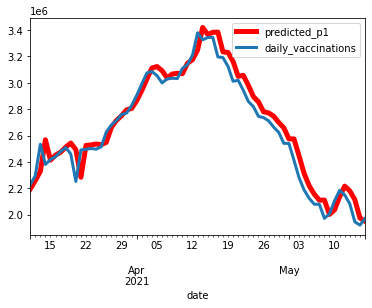

In [32]:
data_panel_test_us = data_panel_test.groupby('date').sum()
ax1 = data_panel_test_us.plot(y = 'predicted_p1', color = 'red', linewidth = 5)
data_panel_test_us.plot(y = 'daily_vaccinations', ax = ax1, linewidth = 3)
plt.show()

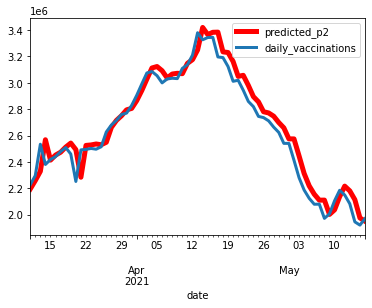

In [33]:
ax2 = data_panel_test_us.plot(y = 'predicted_p2', color = 'red', linewidth = 5)
data_panel_test_us.plot(y = 'daily_vaccinations', ax = ax2, linewidth = 3)
plt.show()

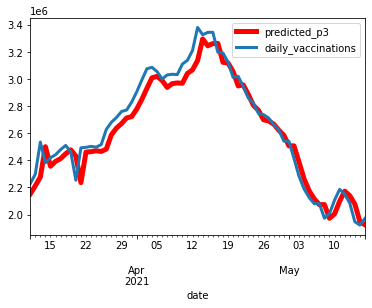

In [34]:
ax3 = data_panel_test_us.plot(y = 'predicted_p3', color = 'red', linewidth = 5)
data_panel_test_us.plot(y = 'daily_vaccinations', ax = ax3, linewidth = 3)
plt.show()

In [35]:
data_panel_test_us

,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,daily_vaccinations_lagged,predicted_p1,predicted_p2,predicted_p3
date,,,,,,,,,,,,,,,,
2021-03-11,98465249.0,132343895.0,64008756.0,658.40,1881.51,33857608.0,1209.30,2644.55,2488801.0,2227346.0,410068.0,43.452,2163603.0,2.195039e+06,2.195039e+06,2.151496e+06
2021-03-12,101399925.0,134576960.0,65899357.0,681.17,1937.86,34997779.0,1245.49,2681.15,2934676.0,2297128.0,422884.0,44.131,2227346.0,2.259221e+06,2.259221e+06,2.211433e+06
2021-03-13,105984329.0,137086100.0,68818317.0,714.05,2013.74,36922888.0,1292.14,2717.01,4584404.0,2534918.0,456970.0,45.234,2297128.0,2.329484e+06,2.329484e+06,2.277048e+06
2021-03-14,107353763.0,137087270.0,69724134.0,726.26,2044.22,37459021.0,1311.48,2717.00,1369434.0,2381503.0,441139.0,45.929,2534918.0,2.568914e+06,2.568914e+06,2.500639e+06
2021-03-15,109365206.0,137087270.0,70994461.0,740.91,2077.20,38323570.0,1332.06,2717.00,2011443.0,2419317.0,441973.0,46.688,2381503.0,2.414441e+06,2.414441e+06,2.356385e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-12,264829930.0,338787670.0,153535257.0,2097.55,4696.54,117440884.0,2702.00,6039.81,1542309.0,2150130.0,344852.0,46.577,2185741.0,2.217329e+06,2.217329e+06,2.172312e+06
2021-05-13,266765002.0,340863850.0,154181269.0,2121.98,4732.42,118786491.0,2714.46,6076.67,1935072.0,2083713.0,345552.0,46.649,2150130.0,2.181473e+06,2.181473e+06,2.138828e+06
2021-05-14,268599919.0,343564350.0,154802982.0,2141.90,4761.70,120050600.0,2724.72,6113.26,1834917.0,1946507.0,314732.0,46.655,2083713.0,2.114598e+06,2.114598e+06,2.076377e+06


### Stock Price

#### Linear Regression

In [36]:
case_confirmed_state = case_confirmed.groupby('Province_State').sum()
case_confirmed_state = case_confirmed_state.iloc[:,5:]
case_confirmed_state = case_confirmed_state.transpose()
case_confirmed_state['cases_confirm'] = case_confirmed_state.sum(axis = 1)
case_confirmed_us = pd.DataFrame(case_confirmed_state['cases_confirm'])

In [37]:
case_confirmed_us.index.name = 'date'
case_confirmed_us = case_confirmed_us.reset_index()
case_confirmed_us.date = pd.to_datetime(case_confirmed_us.date, format = '%m/%d/%y')
case_confirmed_us = case_confirmed_us.set_index('date')

In [38]:
case_confirmed_us

,cases_confirm
date,
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5
...,...
2021-05-22,33104884
2021-05-23,33117737
2021-05-24,33143662


In [39]:
case_death_state = case_death.groupby('Province_State').sum()
case_death_state = case_death_state.iloc[:,6:]
case_death_state = case_death_state.transpose()
case_death_state['cases_death'] = case_death_state.sum(axis = 1)
case_death_us = pd.DataFrame(case_death_state['cases_death'])

In [40]:
case_death_us.index.name = 'date'
case_death_us = case_death_us.reset_index()
case_death_us.date = pd.to_datetime(case_death_us.date, format = '%m/%d/%y')
case_death_us = case_death_us.set_index('date')

In [41]:
case_death_us

,cases_death
date,
2020-01-22,1
2020-01-23,1
2020-01-24,1
2020-01-25,1
2020-01-26,1
...,...
2021-05-22,589703
2021-05-23,589893
2021-05-24,590320


In [42]:
PFE = pfe.join(case_confirmed_us, how = 'left')
PFE = PFE.join(case_death_us, how = 'left')
PFE = PFE.join(Pf_manu, how = 'left')
PFE = PFE.join(data_panel_test_us, how = 'left', lsuffix = '_manu', rsuffix = '_inject')
PFE = PFE.fillna(0)
# PFE= PFE.rename(columns={'adj close': 'adjclose'})

In [43]:
MOD = mrna.join(case_confirmed_us, how = 'left')
MOD = MOD.join(case_death_us, how = 'left')
MOD = MOD.join(Mod_manu, how = 'left')
MOD = MOD.join(data_panel_test_us, how = 'left', lsuffix = '_manu', rsuffix = '_inject')
MOD = MOD.fillna(0)
# MOD = MOD.rename(columns={'adj close': 'adjclose'})

In [44]:
JJ = jnj.join(case_confirmed_us, how = 'left')
JJ = JJ.join(case_death_us, how = 'left')
JJ = JJ.join(JJ_manu, how = 'left')
JJ = JJ.join(data_panel_test_us, how = 'left', lsuffix = '_manu', rsuffix = '_inject')
JJ = JJ.fillna(0)
# JJ = JJ.rename(columns={'adj close': 'adjclose'})

In [63]:
res_pfe = sm.ols(formula = 'rtn ~ cases_confirm + cases_death\
 + total_vaccinations_manu + predicted_p1', data = PFE).fit()
res_pfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    rtn   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2769
Date:                Fri, 28 May 2021   Prob (F-statistic):              0.893
Time:                        02:32:27   Log-Likelihood:                 752.03
No. Observations:                 304   AIC:                            -1494.
Df Residuals:                     299   BIC:                            -1475.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0017      0.003      0.489      0.625      -0.005       0.008
cases_confirm            -5.24e-11   6.98e-10     -0.075      0.940   -1.43e-09    1.32e-09
cases_death             -3.136e-09    4.4e-08     -0.071      0.943   -8.98e-08    8.35e-08
total_vaccinations_manu  1.902e-11   8.46e-11      0.225      0.822   -1.47e-10    1.85e-10
predicted_p1             1.178e-09   2.77e-09      0.426      0.671   -4.27e-09    6.62e-09
==============================================================================
Omnibus:                       35.342   Durbin-Watson:                   2.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.062
Skew:                          -0.003   Prob(JB):                     1.21e-47
Kurtosis:                       7.130   Cond. No.                     1.25e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
PFE_partial = PFE.loc[PFE.index >= '2021-03-11']
res_pfe_partial = sm.ols(formula = 'rtn ~ cases_confirm + cases_death\
 + total_vaccinations_manu + predicted_p1', data = PFE_partial).fit()
res_pfe_partial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    rtn   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.083
Method:                 Least Squares   F-statistic:                    0.1365
Date:                Fri, 28 May 2021   Prob (F-statistic):              0.968
Time:                        02:32:34   Log-Likelihood:                 145.64
No. Observations:                  46   AIC:                            -281.3
Df Residuals:                      41   BIC:                            -272.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.7349      1.872      0.393      0.697      -3.046       4.516
cases_confirm           -2.927e-08   8.62e-08     -0.339      0.736   -2.03e-07    1.45e-07
cases_death                1.1e-07   1.83e-06      0.060      0.952    -3.6e-06    3.82e-06
total_vaccinations_manu  1.079e-09   2.78e-09      0.388      0.700   -4.53e-09    6.69e-09
predicted_p1             5.571e-09    8.9e-09      0.626      0.535   -1.24e-08    2.35e-08
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.606
Skew:                          -0.007   Prob(JB):                        0.739
Kurtosis:                       3.562   Cond. No.                     1.26e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

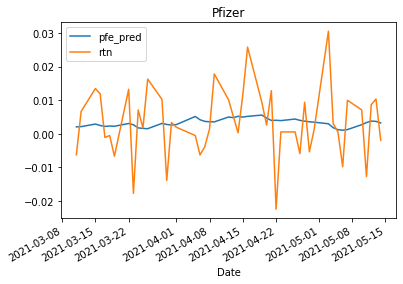

In [65]:
pfe_pred = res_pfe_partial.predict(PFE_partial[['cases_confirm', 'cases_death', 'total_vaccinations_manu', 'predicted_p1']])
PFE_partial['pfe_pred'] = pfe_pred
_ = PFE_partial.plot(y = ['pfe_pred', 'rtn'])
_ = plt.title('Pfizer')

In [66]:
res_mod = sm.ols(formula = 'rtn ~ cases_confirm + cases_death\
 + total_vaccinations_manu + predicted_p1', data = MOD).fit()
res_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    rtn   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.192
Date:                Fri, 28 May 2021   Prob (F-statistic):              0.315
Time:                        02:32:54   Log-Likelihood:                 439.78
No. Observations:                 303   AIC:                            -869.6
Df Residuals:                     298   BIC:                            -851.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0172      0.009      1.817      0.070      -0.001       0.036
cases_confirm            2.018e-09   1.94e-09      1.039      0.300   -1.81e-09    5.84e-09
cases_death               -1.3e-07   1.22e-07     -1.062      0.289   -3.71e-07    1.11e-07
total_vaccinations_manu  -4.93e-10   3.15e-10     -1.566      0.118   -1.11e-09    1.27e-10
predicted_p1             1.447e-08   8.32e-09      1.739      0.083   -1.91e-09    3.08e-08
==============================================================================
Omnibus:                       18.676   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.494
Skew:                           0.327   Prob(JB):                     1.19e-08
Kurtosis:                       4.569   Cond. No.                     1.08e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
MOD_partial = MOD.loc[MOD.index >= '2021-03-11']
res_mod_partial = sm.ols(formula = 'rtn ~ cases_confirm + cases_death\
 + total_vaccinations_manu + predicted_p1', data = MOD_partial).fit()
res_mod_partial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    rtn   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     1.893
Date:                Fri, 28 May 2021   Prob (F-statistic):              0.130
Time:                        02:33:04   Log-Likelihood:                 79.363
No. Observations:                  45   AIC:                            -148.7
Df Residuals:                      40   BIC:                            -139.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -8.6925      7.460     -1.165      0.251     -23.770       6.385
cases_confirm            4.474e-07   2.55e-07      1.753      0.087   -6.85e-08    9.63e-07
cases_death             -6.506e-06   7.21e-06     -0.903      0.372   -2.11e-05    8.06e-06
total_vaccinations_manu -1.989e-08   1.47e-08     -1.355      0.183   -4.96e-08    9.77e-09
predicted_p1             1.865e-08   2.28e-08      0.820      0.417   -2.73e-08    6.47e-08
==============================================================================
Omnibus:                        0.992   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                0.879
Skew:                           0.073   Prob(JB):                        0.644
Kurtosis:                       2.331   Cond. No.                     1.04e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

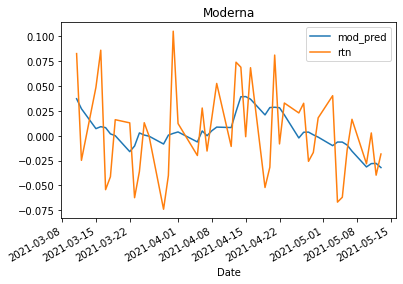

In [68]:
mod_pred = res_mod_partial.predict(MOD_partial[['cases_confirm', 'cases_death', 'total_vaccinations_manu', 'predicted_p1']])
MOD_partial['mod_pred'] = mod_pred
_ = MOD_partial.plot(y = ['mod_pred', 'rtn'])
_ = plt.title('Moderna')

In [69]:
res_jj = sm.ols(formula = 'rtn ~ cases_confirm + cases_death\
 + total_vaccinations_manu + predicted_p1', data = JJ).fit()
res_jj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    rtn   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2156
Date:                Fri, 28 May 2021   Prob (F-statistic):              0.930
Time:                        02:33:21   Log-Likelihood:                 795.00
No. Observations:                 304   AIC:                            -1580.
Df Residuals:                     299   BIC:                            -1561.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0029      0.003      0.979      0.328      -0.003       0.009
cases_confirm            5.105e-10   6.01e-10      0.849      0.397   -6.73e-10    1.69e-09
cases_death             -3.279e-08   3.82e-08     -0.858      0.392   -1.08e-07    4.24e-08
total_vaccinations_manu  2.456e-10   8.95e-10      0.274      0.784   -1.52e-09    2.01e-09
predicted_p1            -1.658e-10    2.3e-09     -0.072      0.943    -4.7e-09    4.37e-09
==============================================================================
Omnibus:                       46.774   Durbin-Watson:                   2.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              429.883
Skew:                           0.104   Prob(JB):                     4.49e-94
Kurtosis:                       8.822   Cond. No.                     4.92e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.92e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
JJ_partial = JJ.loc[JJ.index >= '2021-03-11']
res_jj_partial = sm.ols(formula = 'rtn ~ cases_confirm + cases_death\
 + total_vaccinations_manu + predicted_p1', data = JJ_partial).fit()
res_jj_partial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    rtn   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                    0.4329
Date:                Fri, 28 May 2021   Prob (F-statistic):              0.784
Time:                        02:33:26   Log-Likelihood:                 157.54
No. Observations:                  46   AIC:                            -305.1
Df Residuals:                      41   BIC:                            -295.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.2464      0.250      0.987      0.330      -0.258       0.751
cases_confirm           -5.273e-09   2.45e-08     -0.215      0.831   -5.47e-08    4.42e-08
cases_death             -1.484e-07   1.42e-06     -0.105      0.917   -3.01e-06    2.72e-06
total_vaccinations_manu  3.035e-09   3.48e-09      0.872      0.388   -3.99e-09    1.01e-08
predicted_p1            -5.293e-09   5.11e-09     -1.036      0.306   -1.56e-08    5.02e-09
==============================================================================
Omnibus:                        3.005   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                2.323
Skew:                           0.548   Prob(JB):                        0.313
Kurtosis:                       3.099   Cond. No.                     6.48e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.48e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

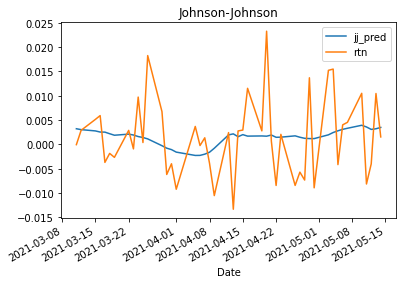

In [71]:
jj_pred = res_jj_partial.predict(JJ_partial[['cases_confirm', 'cases_death', 'total_vaccinations_manu', 'predicted_p1']])
JJ_partial['jj_pred'] = jj_pred
_ = JJ_partial.plot(y = ['jj_pred', 'rtn'])
_ = plt.title('Johnson-Johnson')

#### Elastic Net

In [54]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize

In [72]:
PFE_partial.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46 entries, 2021-03-11 to 2021-05-14
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   open                                 46 non-null     float64
 1   high                                 46 non-null     float64
 2   low                                  46 non-null     float64
 3   close                                46 non-null     float64
 4   adjclose                             46 non-null     float64
 5   volume                               46 non-null     int64  
 6   lagadjclose                          46 non-null     float64
 7   rtn                                  46 non-null     float64
 8   cases_confirm                        46 non-null     int64  
 9   cases_death                          46 non-null     int64  
 10  vaccine                              46 non-null     object 
 11  total_vaccinat

In [56]:
PFE_partial_train = PFE_partial.iloc[:36,:]
PFE_partial_test = PFE_partial.iloc[36:,:]
MOD_partial_train = MOD_partial.iloc[:36,:]
MOD_partial_test = MOD_partial.iloc[36:,:]
JJ_partial_train = JJ_partial.iloc[:36,:]
JJ_partial_test = JJ_partial.iloc[36:,:]

In [79]:
# function to find mean-squared-error
def IOMSE_PFE(Lambda):
  l = Lambda
  mse = np.empty(shape=3)
  for i in range(0, 3):
      data_os = PFE_partial_train.iloc[
          i * 12 : (i + 1) * 12, :
      ]  # out of sample 12 sets of data

      data_is = PFE_partial_train.iloc[
          np.concatenate([range(0, i * 12), range((i + 1) * 12, 36)]), :
      ]  # in sample 24 sets of data

      mse_temp = mean_squared_error(
          data_os.iloc[:, 7],
          ElasticNet(l, l1_ratio=0.5, fit_intercept=False)
          .fit(X=data_is.iloc[:,[6,7,9, 23]], y=data_is.iloc[:, 7])
          .predict(data_os.iloc[:,[6,7,9, 23]]),
      )
      mse[i] = mse_temp

  mse_m = np.mean(mse)
  return mse_m

mse_baseline_pfe = np.mean(np.square((PFE_partial_test.iloc[:, 7] - np.mean(PFE_partial_test.iloc[:, 7]))))

opt_pfe = minimize(fun=IOMSE_PFE, x0=0.01)
lambda_opt_pfe = opt_pfe.x
mse_els_pfe = mean_squared_error(PFE_partial_test.iloc[:,7], ElasticNet(lambda_opt_pfe, l1_ratio = 0.5, fit_intercept = False)\
.fit(X = PFE_partial_train.iloc[:, [6,7,9, 23]], y = PFE_partial_train.iloc[:,4])\
.predict(X = PFE_partial_test.iloc[:, [6,7,9, 23]]))
PseudoR2_els_pfe = 1 - mse_els_pfe / mse_baseline_pfe

print("The optimal lambda is " + str(float(lambda_opt_pfe)) + ".")
print("The MSE of the prediction using ElasticNet is " + str(mse_els_pfe) + ". ")
print("The MSE of the baseline is " + str(mse_baseline_pfe) + ". ")
print("The Pseudo_R2 using ElasticNet is " + str(PseudoR2_els_pfe) + ". ")

The optimal lambda is 0.01.
The MSE of the prediction using ElasticNet is 1565.9858573337815. 
The MSE of the baseline is 0.00013305732009413448. 
The Pseudo_R2 using ElasticNet is -11769256.461565351. 


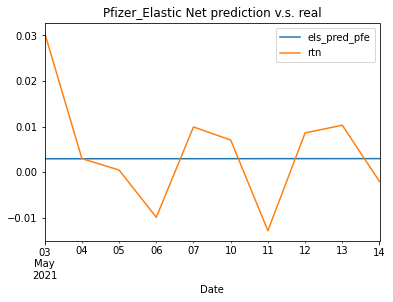

In [85]:
els_pred_pfe = ElasticNet(lambda_opt_pfe, l1_ratio = 0.5, fit_intercept = False)\
.fit(X = PFE_partial_train.iloc[:, [6, 7, 9, 23]], y = PFE_partial_train.iloc[:,7])\
.predict(X = PFE_partial_test.iloc[:, [6, 7, 9, 23]])
PFE_partial_test['els_pred_pfe'] = els_pred_pfe
_ = PFE_partial_test.plot(y = ['els_pred_pfe', 'rtn'])
_ = plt.title("Pfizer_Elastic Net prediction v.s. real")

In [87]:
# function to find mean-squared-error
def IOMSE_MOD(Lambda):
  l = Lambda
  mse = np.empty(shape=3)
  for i in range(0, 3):
      data_os = MOD_partial_train.iloc[
          i * 12 : (i + 1) * 12, :
      ]  # out of sample 12 sets of data

      data_is = MOD_partial_train.iloc[
          np.concatenate([range(0, i * 12), range((i + 1) * 12, 36)]), :
      ]  # in sample 24 sets of data

      mse_temp = mean_squared_error(
          data_os.iloc[:, 7],
          ElasticNet(l, l1_ratio=0.5, fit_intercept=False)
          .fit(X=data_is.iloc[:,[6,7,9, 23]], y=data_is.iloc[:, 7])
          .predict(data_os.iloc[:,[6,7,9, 23]]),
      )
      mse[i] = mse_temp

  mse_m = np.mean(mse)
  return mse_m

mse_baseline_mod = np.mean(np.square((MOD_partial_test.iloc[:, 7] - np.mean(MOD_partial_test.iloc[:, 7]))))

opt_mod = minimize(fun=IOMSE_MOD, x0=0.01)
lambda_opt_mod = opt_mod.x
mse_els_mod = mean_squared_error(MOD_partial_test.iloc[:,7], ElasticNet(lambda_opt_mod, l1_ratio = 0.5, fit_intercept = False)\
.fit(X = MOD_partial_train.iloc[:, [6,7,9, 23]], y = MOD_partial_train.iloc[:,7])\
.predict(X = MOD_partial_test.iloc[:, [6,7,9, 23]]))
PseudoR2_els_mod = 1 - mse_els_mod / mse_baseline_mod

print("The optimal lambda is " + str(float(lambda_opt_mod)) + ".")
print("The MSE of the prediction using ElasticNet is " + str(mse_els_mod) + ". ")
print("The MSE of the baseline is " + str(mse_baseline_mod) + ". ")
print("The Pseudo_R2 using ElasticNet is " + str(PseudoR2_els_mod) + ". ")

The optimal lambda is 3.9774870781886523e-07.
The MSE of the prediction using ElasticNet is 3.461248281777655e-11. 
The MSE of the baseline is 0.0011012429325236693. 
The Pseudo_R2 using ElasticNet is 0.9999999685696209. 


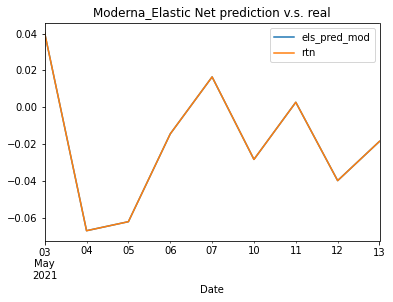

In [88]:
els_pred_mod = ElasticNet(lambda_opt_mod, l1_ratio = 0.5, fit_intercept = False)\
.fit(X = MOD_partial_train.iloc[:, [6, 7, 9, 23]], y = MOD_partial_train.iloc[:,7])\
.predict(X = MOD_partial_test.iloc[:, [6, 7, 9, 23]])
MOD_partial_test['els_pred_mod'] = els_pred_mod
_ = MOD_partial_test.plot(y = ['els_pred_mod', 'rtn'])
_ = plt.title("Moderna_Elastic Net prediction v.s. real")

In [83]:
# function to find mean-squared-error
def IOMSE_JJ(Lambda):
  l = Lambda
  mse = np.empty(shape=3)
  for i in range(0, 3):
      data_os = JJ_partial_train.iloc[
          i * 12 : (i + 1) * 12, :
      ]  # out of sample 12 sets of data

      data_is = JJ_partial_train.iloc[
          np.concatenate([range(0, i * 12), range((i + 1) * 12, 36)]), :
      ]  # in sample 24 sets of data

      mse_temp = mean_squared_error(
          data_os.iloc[:, 7],
          ElasticNet(l, l1_ratio=0.5, fit_intercept=False)
          .fit(X=data_is.iloc[:,[6,7,9, 23]], y=data_is.iloc[:, 7])
          .predict(data_os.iloc[:,[6,7,9, 23]]),
      )
      mse[i] = mse_temp

  mse_m = np.mean(mse)
  return mse_m

mse_baseline_jj = np.mean(np.square((JJ_partial_test.iloc[:, 7] - np.mean(JJ_partial_test.iloc[:, 7]))))

opt_jj = minimize(fun=IOMSE_JJ, x0=0.01)
lambda_opt_jj = opt_jj.x
mse_els_jj = mean_squared_error(JJ_partial_test.iloc[:,7], ElasticNet(lambda_opt_jj, l1_ratio = 0.5, fit_intercept = False)\
.fit(X = JJ_partial_train.iloc[:, [6,7,9, 23]], y = JJ_partial_train.iloc[:,7])\
.predict(X = JJ_partial_test.iloc[:, [6,7,9, 23]]))
PseudoR2_els_jj = 1 - mse_els_jj / mse_baseline_jj

print("The optimal lambda is " + str(float(lambda_opt_jj)) + ".")
print("The MSE of the prediction using ElasticNet is " + str(mse_els_jj) + ". ")
print("The MSE of the baseline is " + str(mse_baseline_jj) + ". ")
print("The Pseudo_R2 using ElasticNet is " + str(PseudoR2_els_jj) + ". ")

The optimal lambda is 0.021392076612537496.
The MSE of the prediction using ElasticNet is 7.763348289557557e-05. 
The MSE of the baseline is 6.251893598164217e-05. 
The Pseudo_R2 using ElasticNet is -0.2417595033666533. 


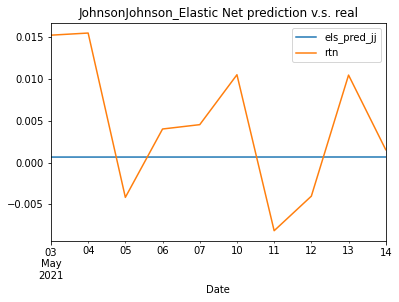

In [89]:
els_pred_jj = ElasticNet(lambda_opt_jj, l1_ratio = 0.5, fit_intercept = False)\
.fit(X = JJ_partial_train.iloc[:, [6, 7, 9, 23]], y = JJ_partial_train.iloc[:,7])\
.predict(X = JJ_partial_test.iloc[:, [6, 7, 9, 23]])
JJ_partial_test['els_pred_jj'] = els_pred_jj
_ = JJ_partial_test.plot(y = ['els_pred_jj', 'rtn'])
_ = plt.title("JohnsonJohnson_Elastic Net prediction v.s. real")